In [1]:
!pip install matplotlib seaborn plotly xgboost

In [2]:
# imported import liberaries
import glob
import pandas as pd
import json
import requests


import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')




In [3]:
glob.glob("*.csv")

['ResaleFlatPricesBasedonApprovalDate19901999.csv',
 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv',
 'ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv',
 'ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv',
 'ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv']

In [4]:
# five csv files grouping together
#Importing and Loading the datasets
# *.csv is used to get the files from outside the folder

df = pd.concat([pd.read_csv(f) for f in glob.glob("*.csv")], ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
df.shape

(929324, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929324 entries, 0 to 929323
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929324 non-null  object 
 1   town                 929324 non-null  object 
 2   flat_type            929324 non-null  object 
 3   block                929324 non-null  object 
 4   street_name          929324 non-null  object 
 5   storey_range         929324 non-null  object 
 6   floor_area_sqm       929324 non-null  float64
 7   flat_model           929324 non-null  object 
 8   lease_commence_date  929324 non-null  int64  
 9   resale_price         929324 non-null  float64
 10  remaining_lease      220274 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.0+ MB


In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
df.describe().T  #quick overview of the data

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,929324.0,95.690294,25.821944,28.0,73.0,93.0,113.0,307.0
lease_commence_date,929324.0,1988.298276,10.685851,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,929324.0,321445.697679,171102.128345,5000.0,193500.0,298000.0,418000.0,1588000.0


In [9]:
 #returns the count of all unique values in the given index in descending order, without any null values
df['resale_price'].value_counts()

resale_price
300000.0    6925
350000.0    6856
280000.0    6550
320000.0    6530
400000.0    6302
            ... 
210300.0       1
185850.0       1
106650.0       1
395688.0       1
58560.0        1
Name: count, Length: 9547, dtype: int64

**Data cleaning**

In [10]:
 #to count the number of unique values in each column of a DataFrame
df.nunique()

month                   415
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9547
remaining_lease         727
dtype: int64

In [11]:
#to count the number of missing (NaN) values in each column of a DataFrame
#Handling Null Values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [12]:
# coverting reamining_lease colume (91 years 01 months) time date format
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [14]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
929319,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,488000.0,82.0
929320,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,455000.0,69.0
929321,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,778000.0,74.0
929322,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,575000.0,70.0
929323,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,735000.0,70.0


In [15]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711647
95.000000      2417
67.000000      2212
69.000000      1914
71.000000      1764
              ...  
97.583333         1
96.833333         1
41.500000         1
97.416667         1
97.250000         1
Name: count, Length: 674, dtype: int64

In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

**Wrong Formate**

In [17]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [18]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [19]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
929322,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,575000.0,70.0,2016,12,1,3
929323,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,735000.0,70.0,2016,12,10,12


In [20]:
df.drop('storey_range', axis = 1, inplace= True)

In [21]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [22]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [23]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

** Text error**

In [24]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [25]:
df['town'].value_counts()

town
TAMPINES           80135
YISHUN             70223
JURONG WEST        66830
BEDOK              66773
WOODLANDS          65676
ANG MO KIO         52180
HOUGANG            50889
BUKIT BATOK        44554
CHOA CHU KANG      38441
BUKIT MERAH        34452
PASIR RIS          33274
SENGKANG           32631
TOA PAYOH          31612
QUEENSTOWN         28818
GEYLANG            28229
CLEMENTI           28086
BUKIT PANJANG      27754
KALLANG/WHAMPOA    27265
JURONG EAST        24827
SERANGOON          22863
BISHAN             21297
PUNGGOL            20794
SEMBAWANG          13922
MARINE PARADE       8048
CENTRAL AREA        7164
BUKIT TIMAH         2523
LIM CHU KANG          64
Name: count, dtype: int64

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353286
3 ROOM              296508
5 ROOM              195953
EXECUTIVE            69824
2 ROOM               11905
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [27]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353286
3 ROOM              296508
5 ROOM              195953
EXECUTIVE            69824
2 ROOM               11905
1 ROOM                1304
MULTI GENERATION       544
Name: count, dtype: int64

In [29]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17626
BEDOK RESERVOIR RD    14742
ANG MO KIO AVE 10     13834
ANG MO KIO AVE 3      12170
HOUGANG AVE 8          9376
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   195602
Improved                  168753
New Generation            110354
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47012
Simplified                 34360
Apartment                  25664
Standard                   25220
SIMPLIFIED                 23258
Maisonette                 17513
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10165
APARTMENT                   9901
DBSS                        3333
Adjoined flat               1254
Model A-Maisonette          1097
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      439
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       124
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [31]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [32]:
df['flat_model'].value_counts()

flat_model
Model A                   265983
Improved                  242342
New Generation            189252
Simplified                 57618
Premium Apartment          47018
Standard                   42595
Apartment                  35565
Maisonette                 29728
Model A2                   10165
DBSS                        3333
Model A-Maisonette          2079
Adjoined flat               1254
Terrace                      694
Multi Generation             544
Type S1                      439
Type S2                      217
2-room                       145
Improved-Maisonette          126
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          33
Name: count, dtype: int64

** duplicates**

In [33]:
df.duplicated().sum()

np.int64(2347)

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

**Outliers**

In [35]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [36]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

** using boxplot**

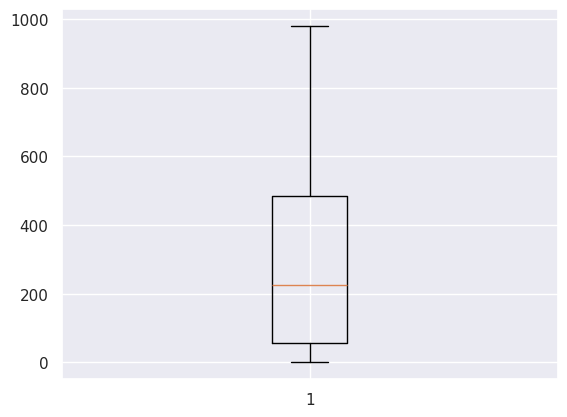

In [37]:
# Creating plot
plt.boxplot(df['block'])

# show plot
plt.show()

In [38]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-586.0), np.float64(1126.0))

In [39]:
df.block = df.block.clip(lower_bound , upper_bound)

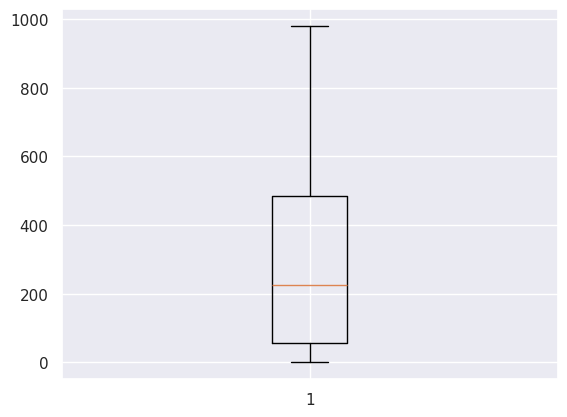

In [40]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

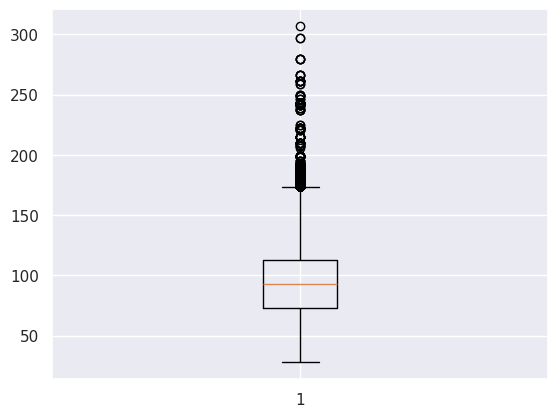

In [41]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [42]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(13.0), np.float64(173.0))

In [43]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

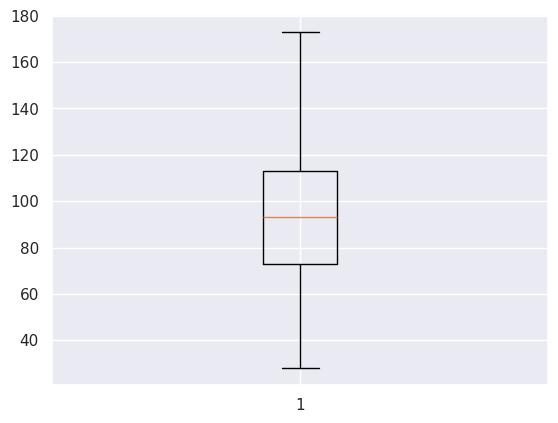

In [44]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

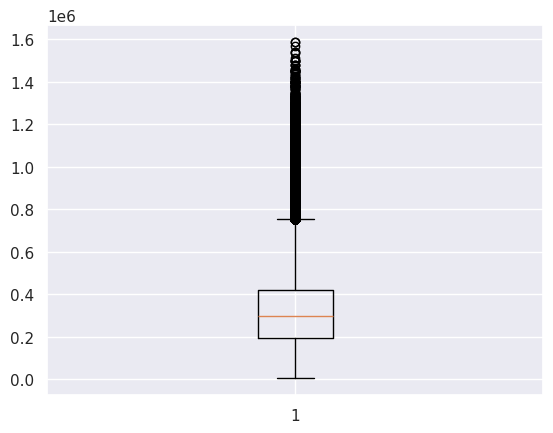

In [45]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [46]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-142000.0), np.float64(754000.0))

In [47]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

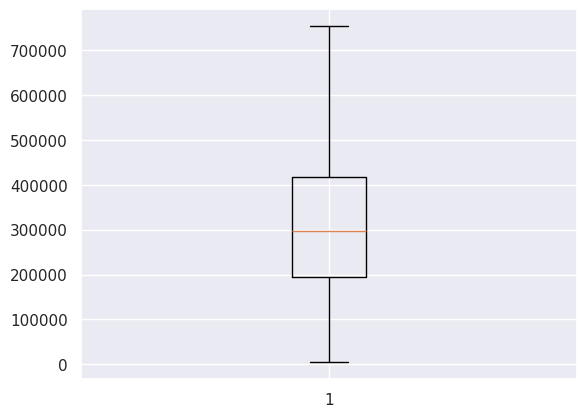

In [48]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

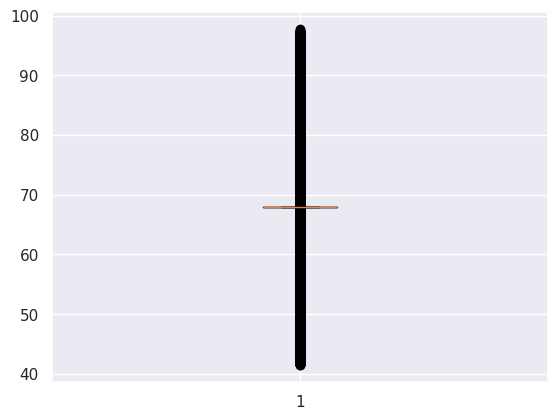

In [49]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [50]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(68.0), np.float64(68.0))

In [51]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

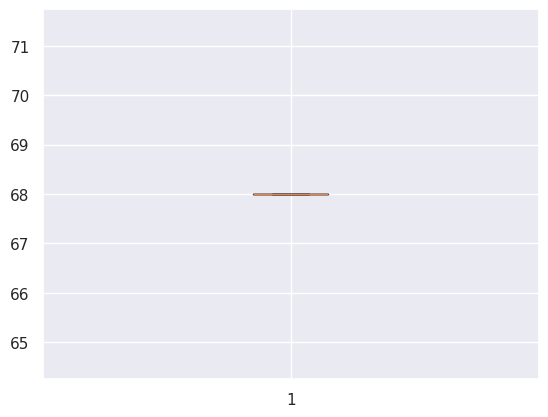

In [52]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

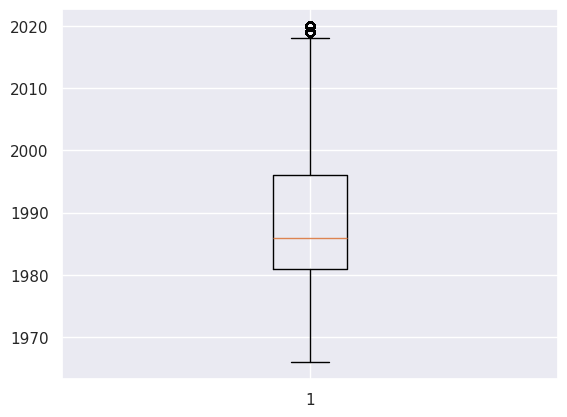

In [53]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [54]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(1958.5), np.float64(2018.5))

In [55]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

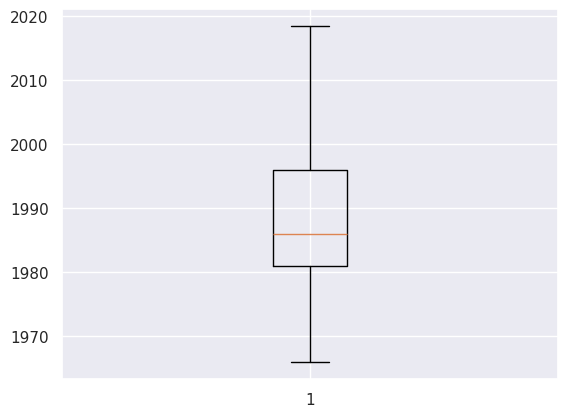

In [56]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

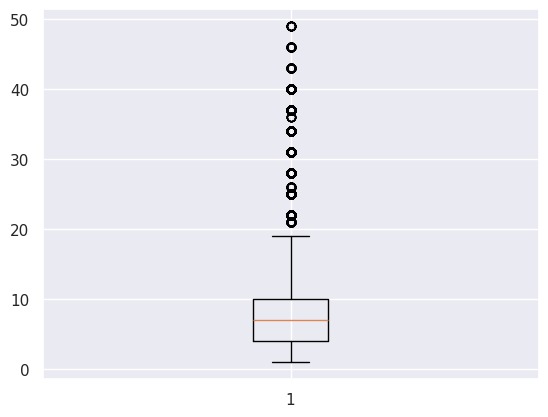

In [57]:

# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [58]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-5.0), np.float64(19.0))

In [59]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

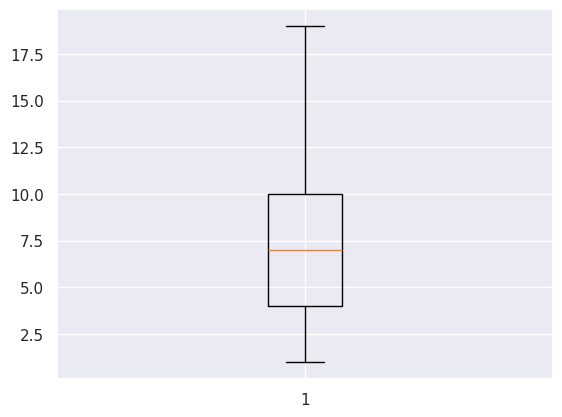

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

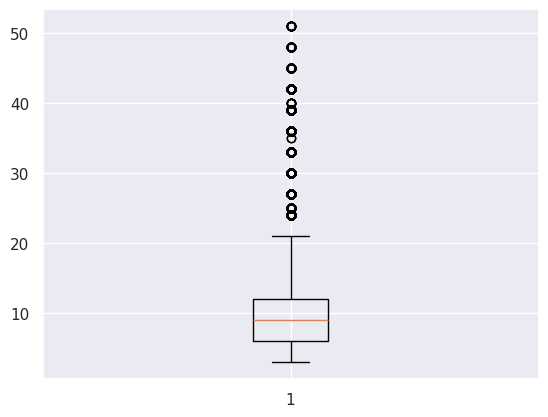

In [61]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

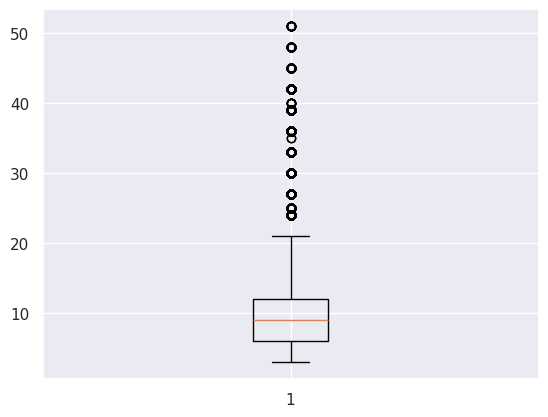

In [62]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [63]:

Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-3.0), np.float64(21.0))

In [64]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

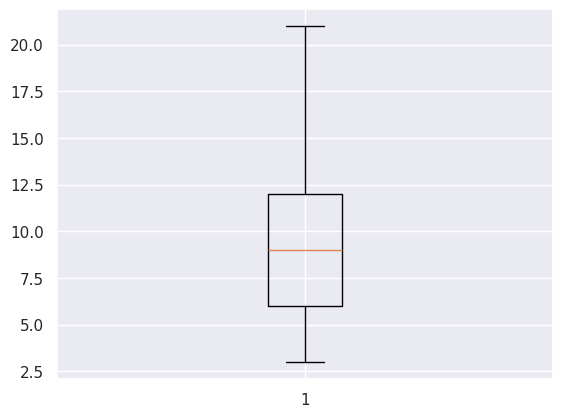

In [65]:

# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS

Categorical Vs Frequency using BarPlot

In [66]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

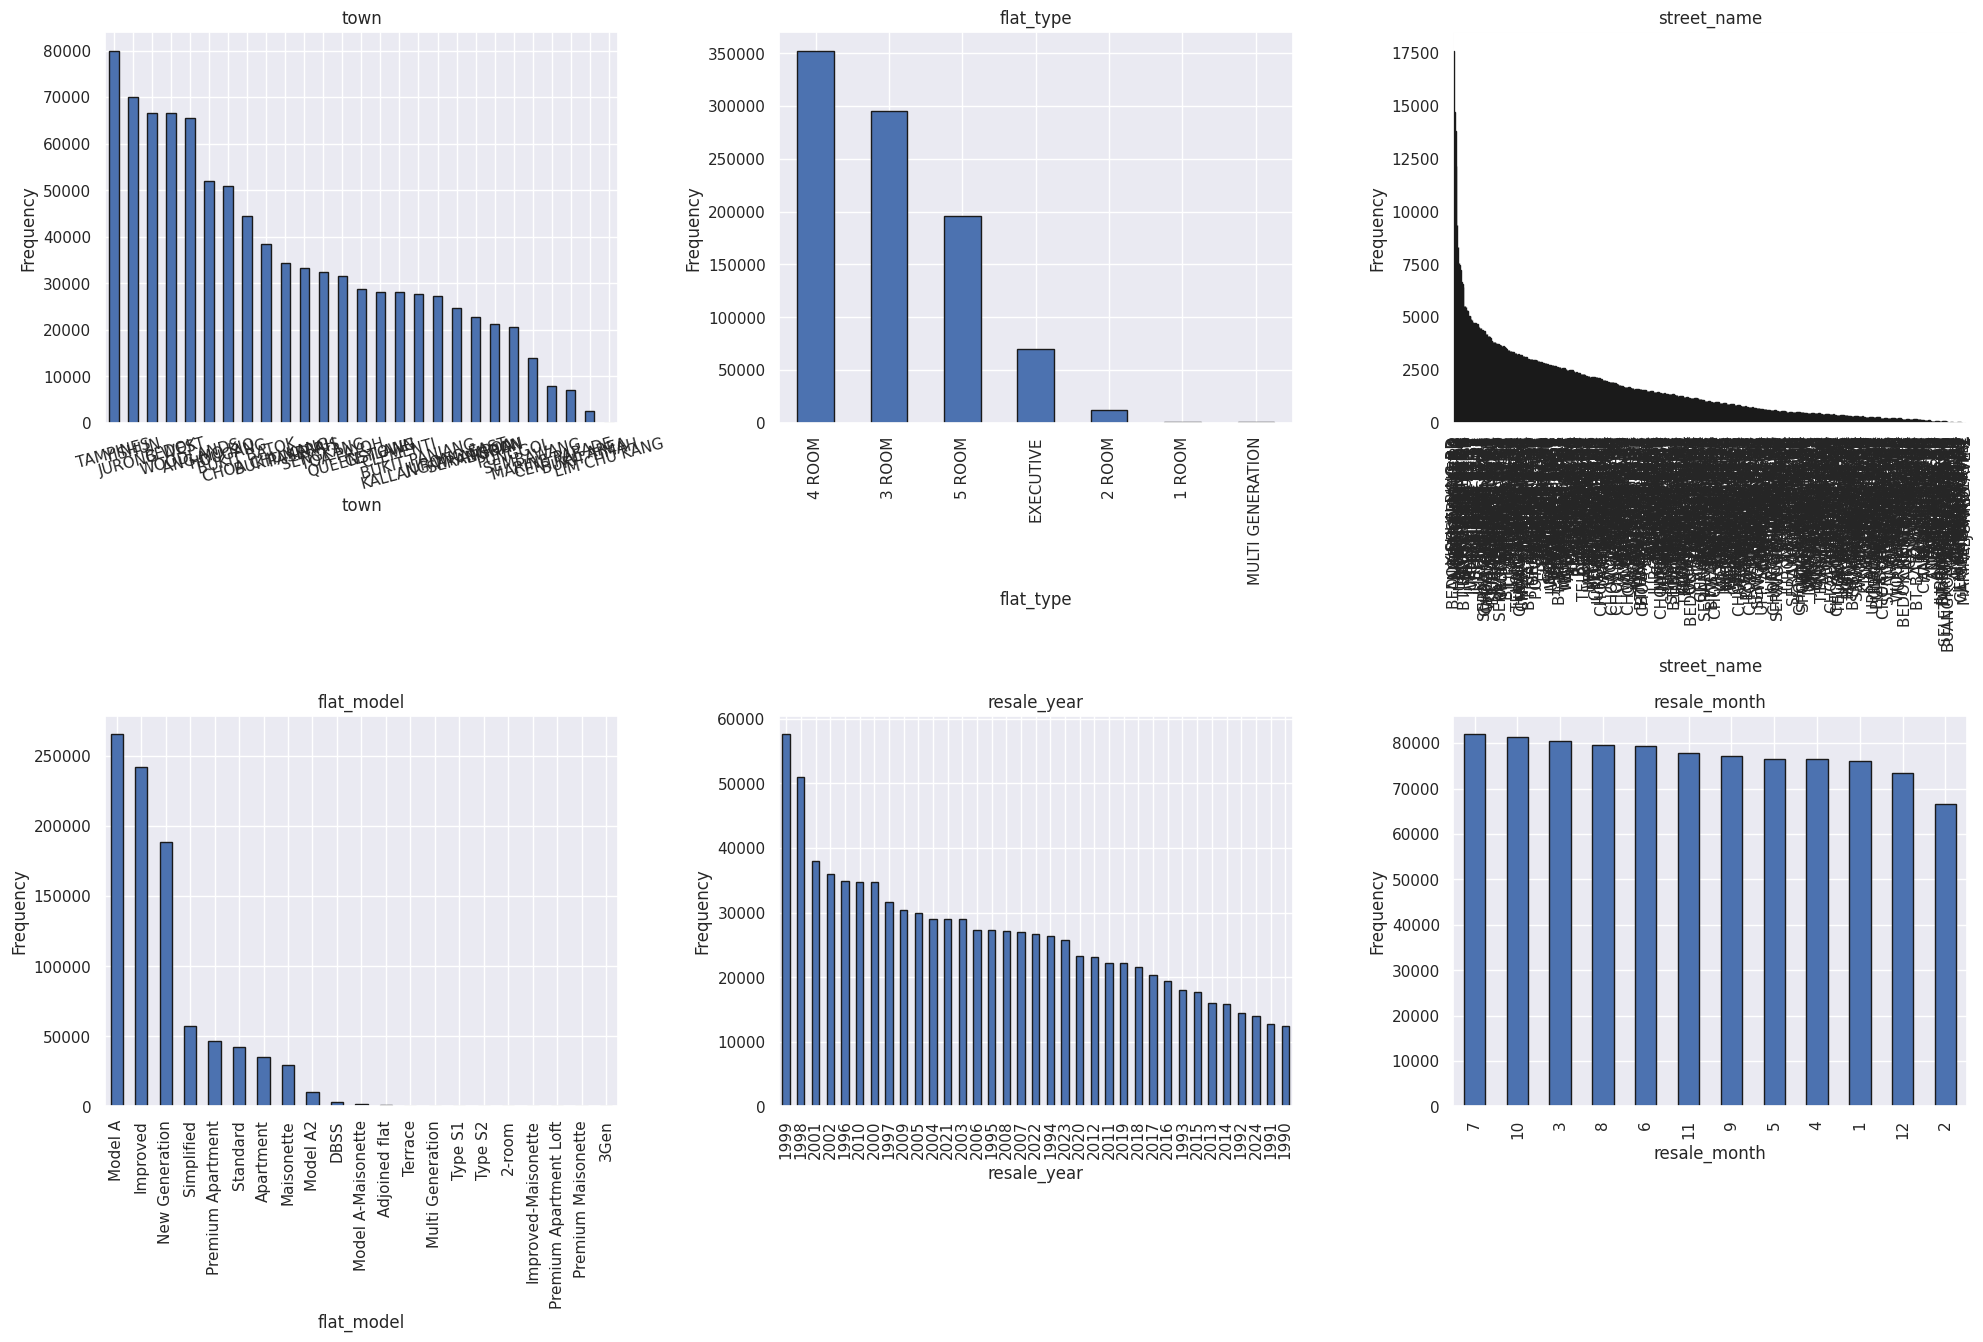

In [67]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Feature Vs Target (Categorical Data )


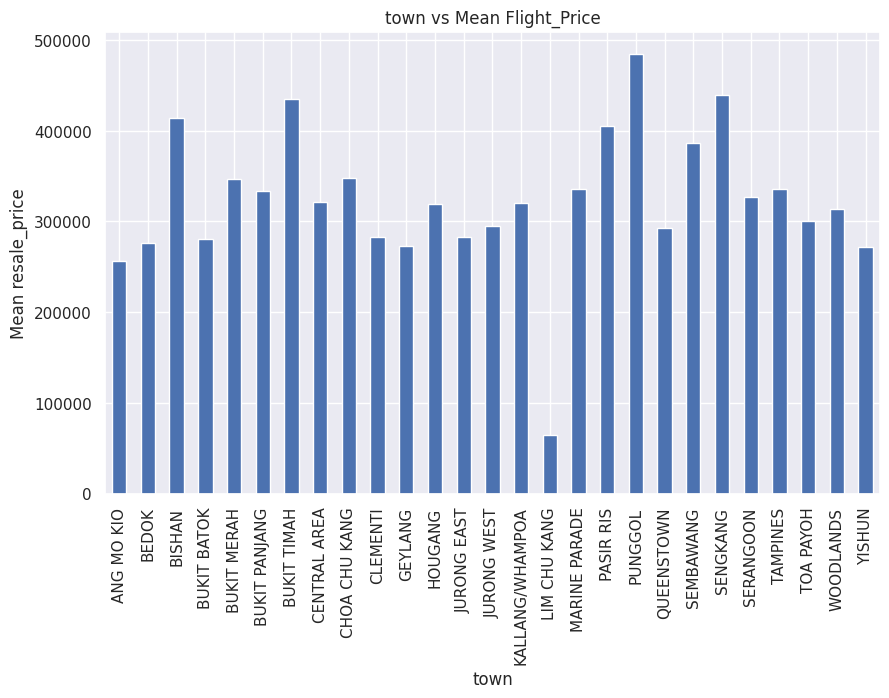

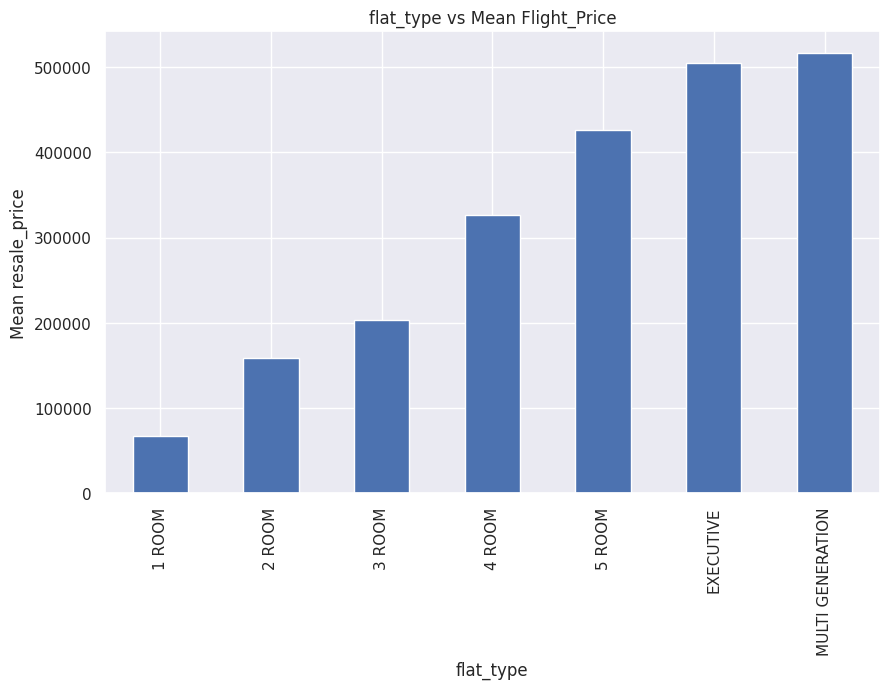

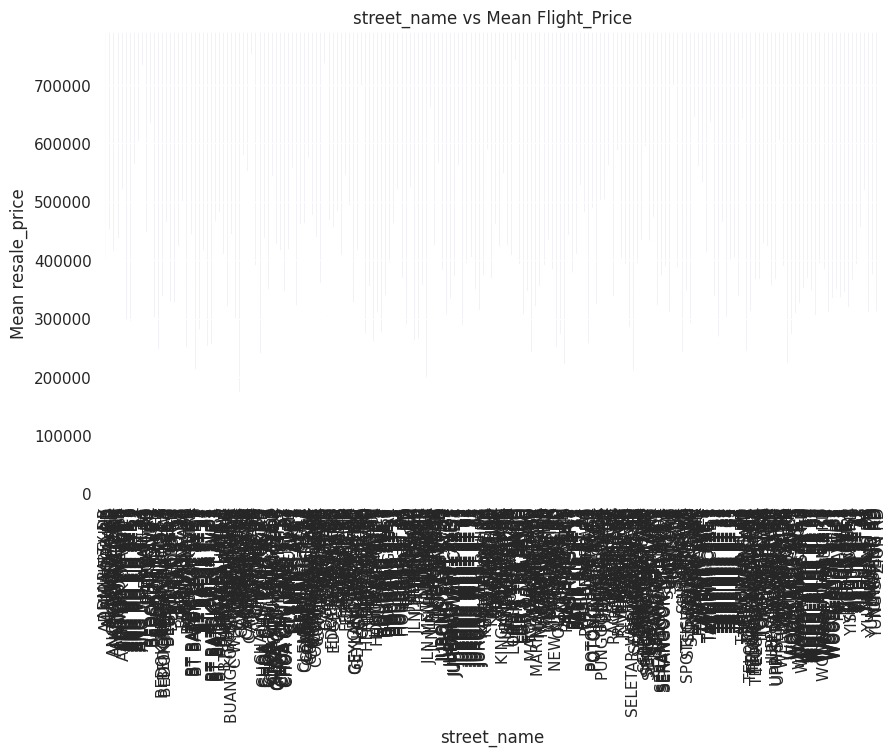

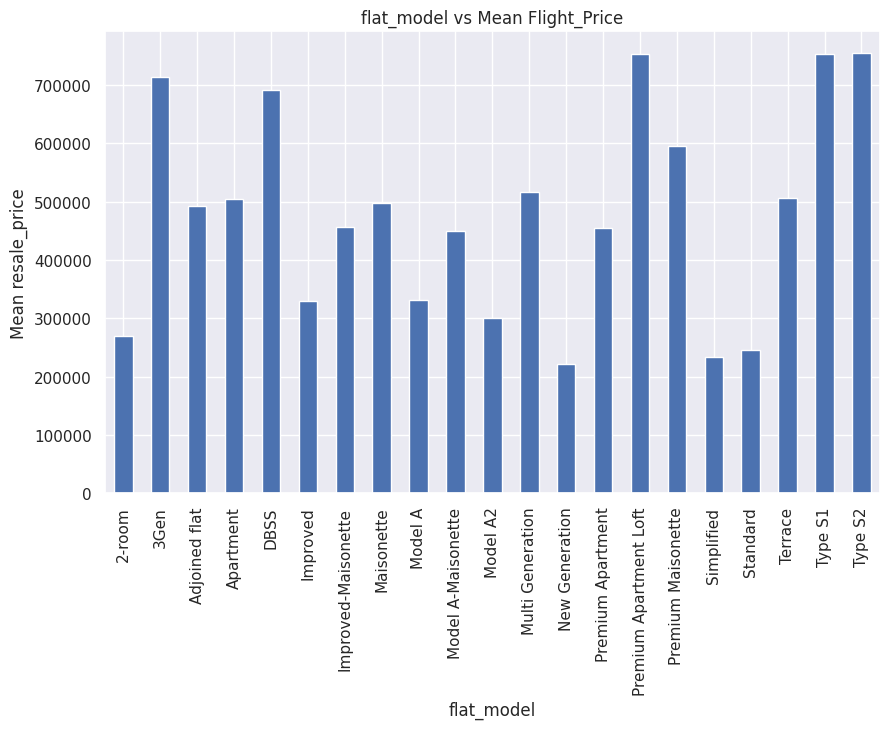

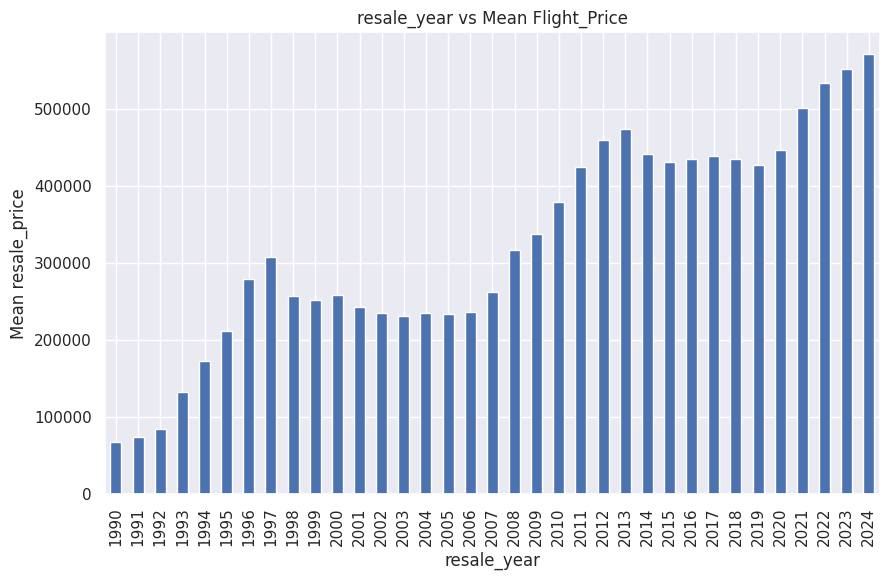

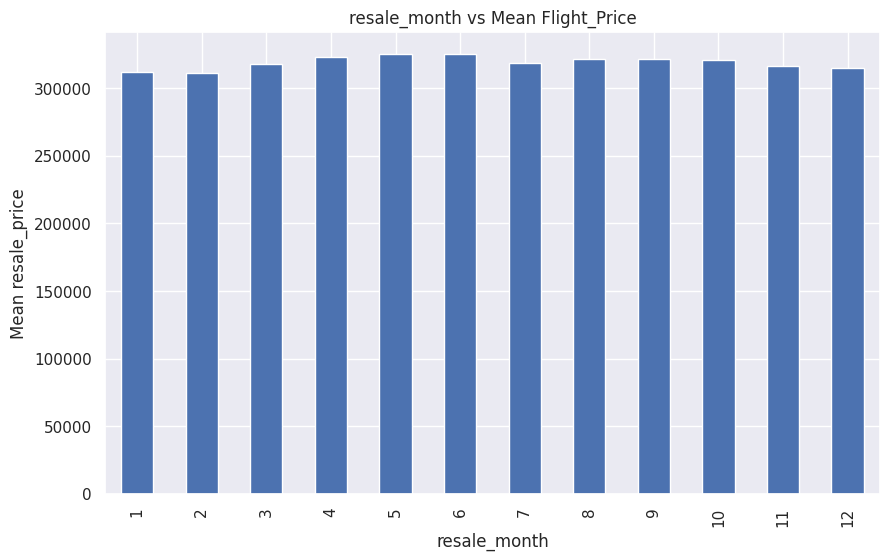

In [68]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

Feature Vs Target (Condinues Data )

In [69]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [70]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

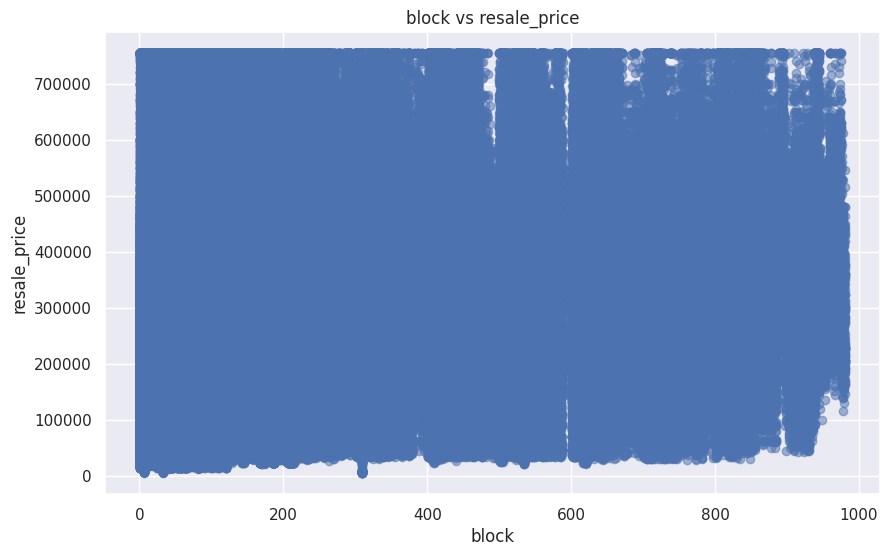

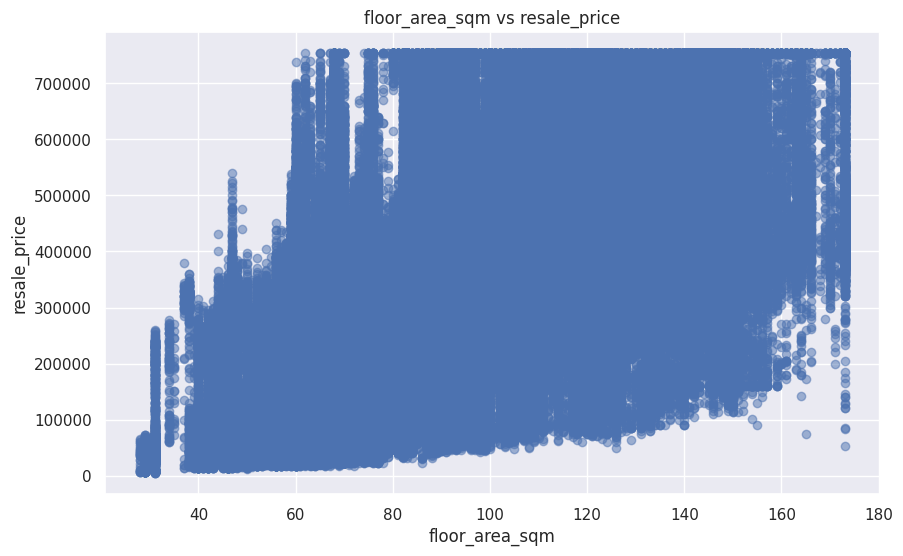

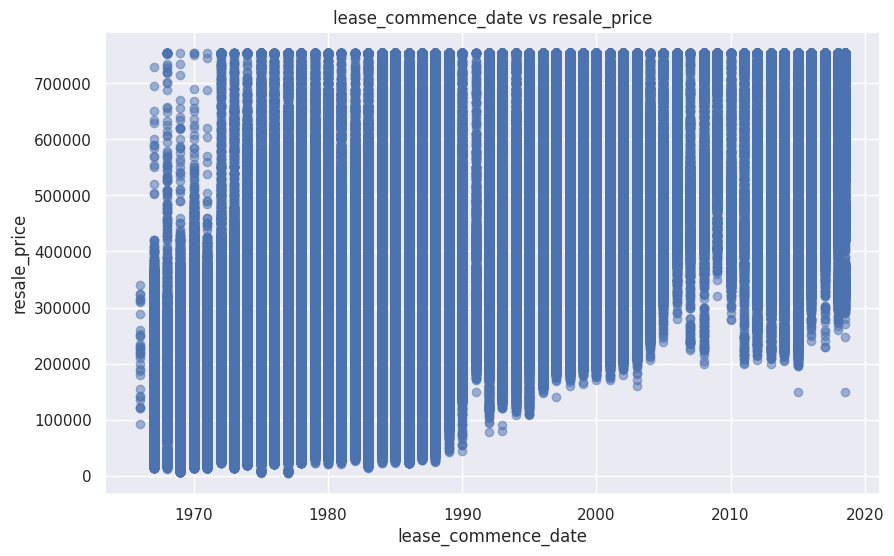

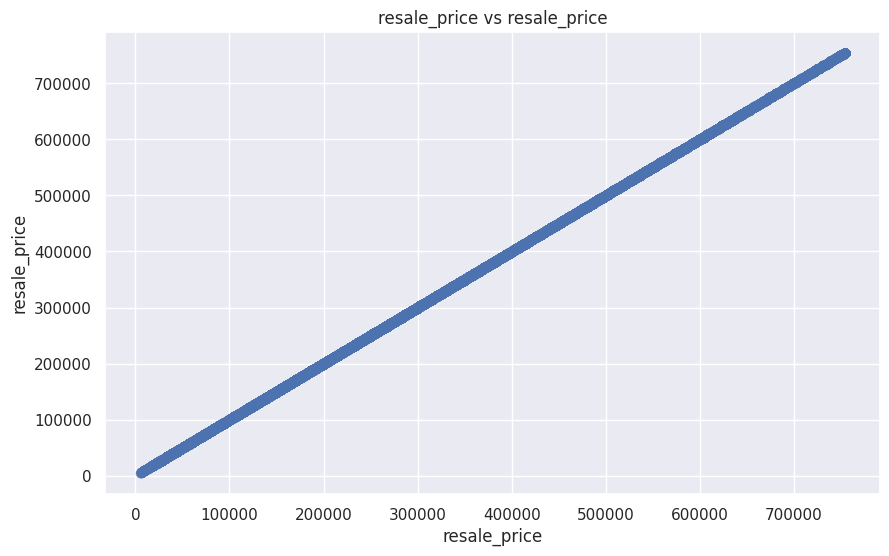

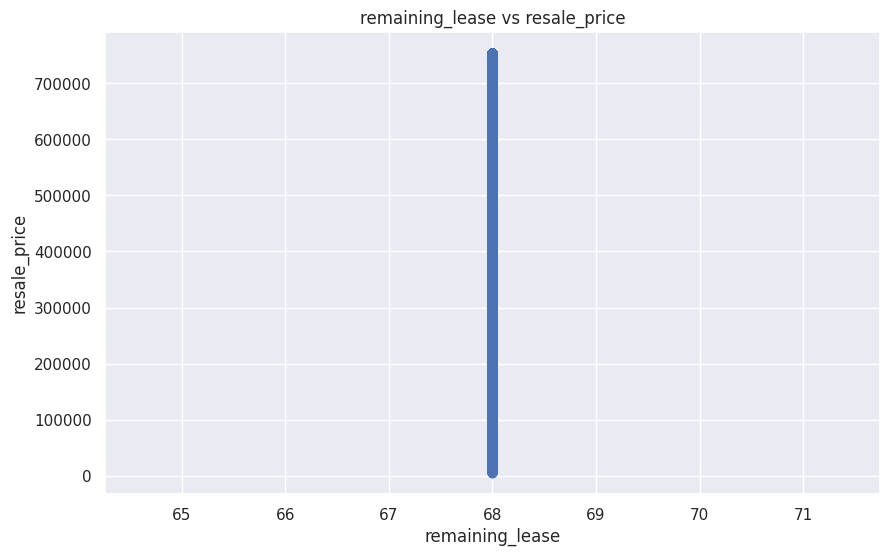

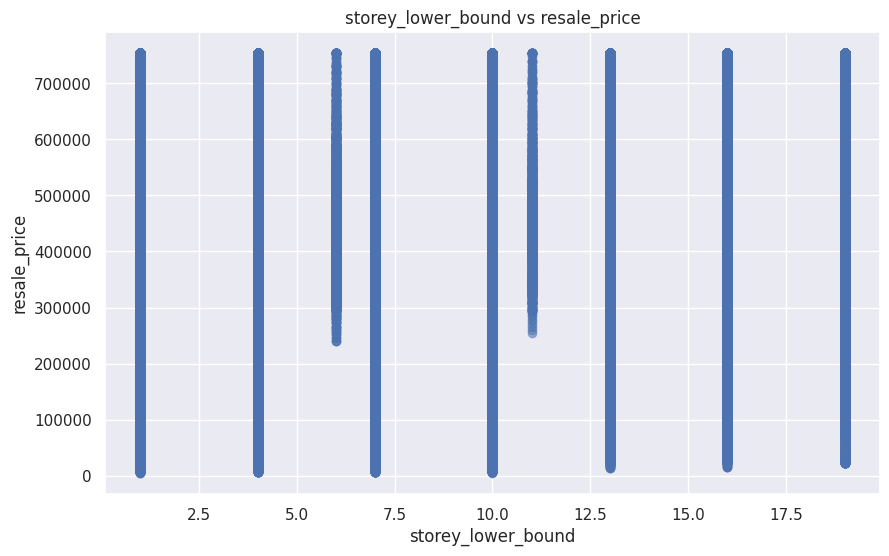

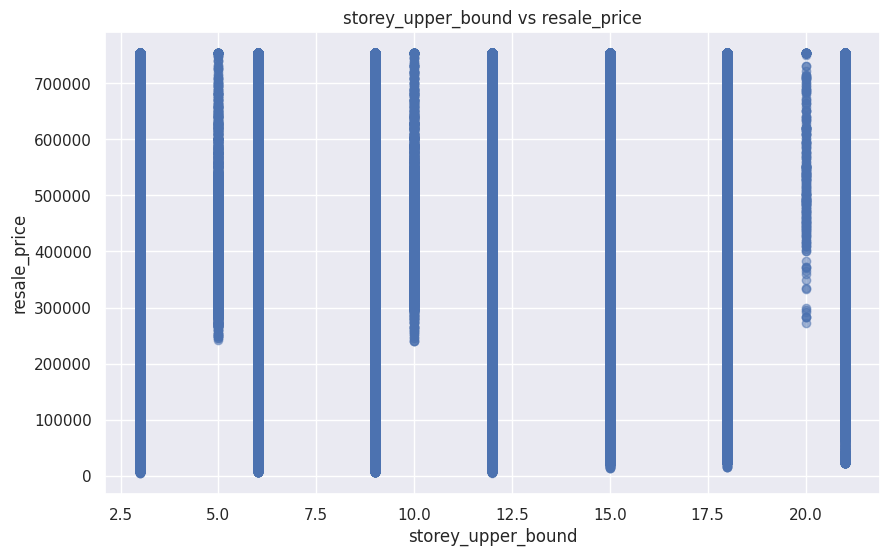

In [71]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

Encoding Categorical Variables


In [72]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [73]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [74]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [75]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [76]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [77]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [78]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [79]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [80]:
# save the processed data for the deployment
df1.to_csv('final.csv')

Correlation

In [81]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208313,0.050267,0.588266,0.201102,0.163781,0.333020,0.123391,NaN,0.123874,0.003880,-0.019096,-0.018833
flat_type,0.208313,1.000000,0.127806,0.389253,0.954856,0.242332,0.407707,0.599264,NaN,0.100757,0.003379,0.077410,0.077741
block,0.050267,0.127806,1.000000,0.071180,0.187808,-0.003256,0.002743,-0.083383,NaN,-0.116867,0.002348,-0.124889,-0.124925
street_name,0.588266,0.389253,0.071180,1.000000,0.362897,0.339271,0.724760,0.366058,NaN,0.305728,0.006065,0.069881,0.070504
floor_area_sqm,0.201102,0.954856,0.187808,0.362897,1.000000,0.200253,0.385671,0.573701,NaN,0.062463,0.002847,0.043664,0.043853
flat_model,0.163781,0.242332,-0.003256,0.339271,0.200253,1.000000,0.355596,0.245786,NaN,0.162440,0.001489,0.020114,0.020470
lease_commence_date,0.333020,0.407707,0.002743,0.724760,0.385671,0.355596,1.000000,0.544094,NaN,0.431438,0.003129,0.154171,0.154567
resale_price,0.123391,0.599264,-0.083383,0.366058,0.573701,0.245786,0.544094,1.000000,NaN,0.684518,0.004631,0.210021,0.212665
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123874,0.100757,-0.116867,0.305728,0.062463,0.162440,0.431438,0.684518,NaN,1.000000,-0.026427,0.096775,0.098803


Heatmap

<Axes: >

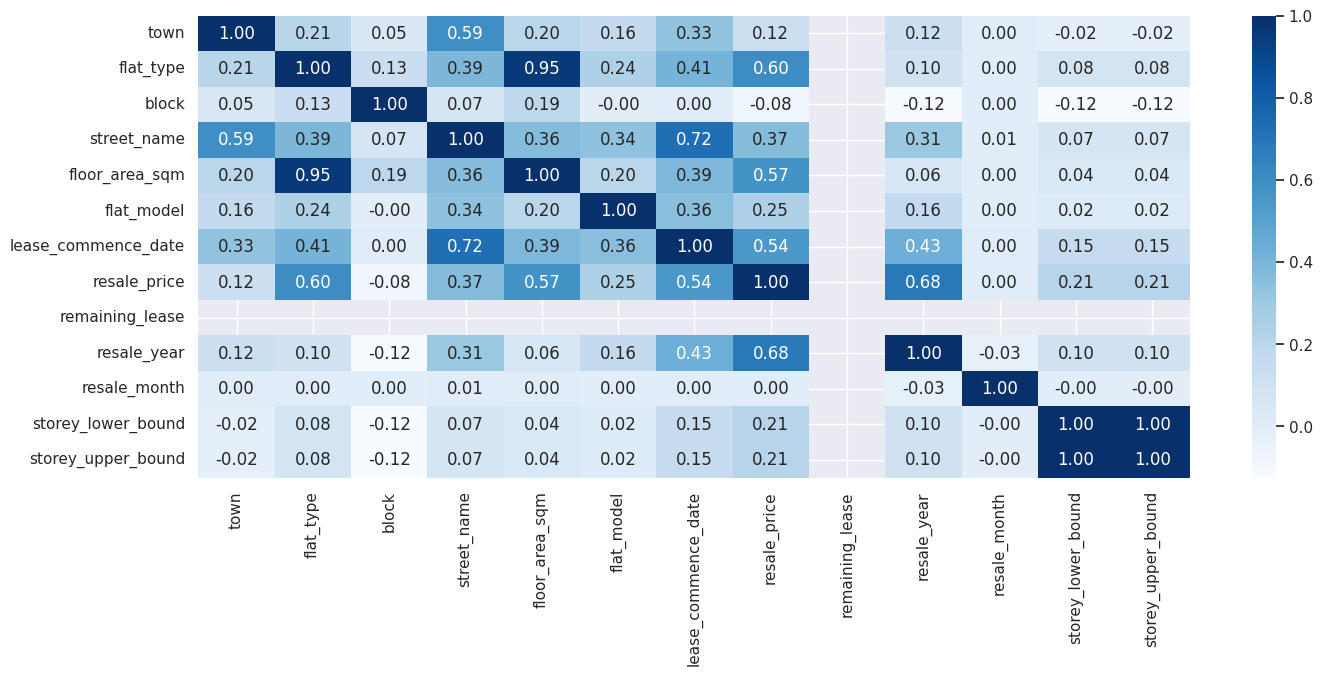

In [82]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

Right to Machine learning
split

In [83]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [84]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(741581, 12) (185396, 12) (741581,) (185396,)


saclling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.94108049, -1.0708316 , -0.33038054, ...,  1.01186964,
          0.76787053,  0.76476796],
        [-1.36688521,  1.03823073, -0.29991875, ..., -0.74755323,
          0.76787053,  0.76476796],
        [-0.08468204, -0.01630043,  0.86905265, ...,  0.1321582 ,
         -1.254046  , -1.25755921],
        ...,
        [ 1.45396176,  1.03823073, -0.18949474, ..., -0.16107894,
          1.4418427 ,  1.43887702],
        [-0.34112267, -1.0708316 ,  1.39832634, ...,  0.42539535,
         -1.254046  , -1.25755921],
        [-1.23866489, -0.01630043,  0.44639524, ...,  0.71863249,
         -0.58007383, -0.58345016]]),
 array([[ 0.94108049, -0.01630043,  1.43259586, ..., -0.74755323,
         -0.58007383, -0.58345016],
        [ 1.06930081, -1.0708316 , -0.64642167, ...,  1.59834393,
         -1.254046  , -1.25755921],
        [-0.34112267, -0.01630043, -0.57026718, ..., -1.04079038,
         -0.58007383, -0.58345016],
        ...,
        [ 0.42819923, -2.12536277, -1.10715632, ...,  

Model_Fit

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear regression

In [87]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[390950.02370015 377062.55855995 353637.94681967 ... 349444.62151174
 239818.976416   309210.95290236]
313499    335000.0
456246    370000.0
700085    222000.0
725160    201000.0
883706    460000.0
            ...   
720320    235000.0
34855     226000.0
447245    375888.0
16535     138000.0
474769    322000.0
Name: resale_price, Length: 185396, dtype: float64


In [88]:
linear_model.score(X_test, y_test)

0.7943314566071578

In [89]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

np.float64(0.7930648143725942)

K Nearest Neighbor Regression

In [90]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29013.37035605946
Mean Squared Error (MSE)     : 1791499198.1092317
Root Mean Square Error (RMSE): 42326.1053973695
R-squared (R2) Score         : 0.933051561394382


Decision Tree Regression

In [91]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17475.097729988338
Mean Squared Error (MSE)     : 675746993.9378043
Root Mean Square Error (RMSE): 25995.134043466758
R-squared (R2) Score         : 0.974747291997494


Random Forest Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Xg Boost Regression

In [ ]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Finalizeing Models

In [ ]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

Suggestion

In [ ]:
rf_regressor.feature_importances_

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

In [ ]:
model=rf_regressor.fit(X_train, y_train)

In [ ]:
model

In [ ]:
model

In [ ]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

In [ ]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

In [ ]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [ ]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred